# Postdam PM2.5 Traditional Forcasting

* Between 2013 and 2023, data collected by DEBB021 was used.
* To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [1]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

In [2]:
# import src
import model_base as mb
import statistic as td

## Data Exploration

* Load Data


In [3]:
# df= mb.get_cleaned_datetime_df()
# # Set Index
# df['Start'] = pd.to_datetime(df['Start'])
# mb.set_start_index(df, 'Start')
# df.head()


df_hourly, df_daily, df_weekly, df_monthly = mb.read_date_freq()


## TIMESTAMP INDEX
# HOURLY 
mb.set_start_date_time_index(df_hourly)


# DAILY 
mb.set_start_date_time_index(df_daily)


# WEEKLY 
mb.set_start_date_time_index(df_weekly)


# MONTHLY 
mb.set_start_date_time_index(df_monthly)


# ARIMA

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
ARIMA(p,d,q) are defined as follows:

p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.


# Model creation and Evolve

## Diagnose Fitted Model
* Standardized residual: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.
* Histogram: The density plot suggest normal distribution with mean slighlty shifted towards right.
* Theoretical Quantiles: Mostly the dots fall not in line with the red line, deviations would imply the distribution is skewed.
* Correlogram: The Correlogram, (or ACF plot) shows the residual errors are not autocorrelated. The ACF plot would imply that there is some pattern in the residual errors which are not explained in the model.

## Residuals
Residual should have ~0 mean. If residual has other than zero, then forecasts are biased. Adjusting bias is easy: if residual mean is other than zero them simply add mean value to all forecast then bias problem solved. if forecast residuals that do not contain these characteristics have room for improvements. Adding additional terms to our ETS or ARIMA model may alleviate this issue.


Training set size: 52588
Validation set size: 17530
Test set size: 17530


/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.89001D+00    |proj g|=  9.38638D-04


 This problem is unconstrained.



At iterate    5    f=  2.95489D+00    |proj g|=  1.47739D-02

At iterate   10    f=  2.95488D+00    |proj g|=  3.01238D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     11     31      1     0     0   1.339D-05   2.955D+00
  F =   2.9548783567836758     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
===== Summary ======
                               SARIMAX Results                                
Dep. Variable:            PM2.5-Value   No. Observations:                52588
Model:                        SARIMAX   Log Likelihood             -155391.143
Date:                Sun, 24 Dec 2023   A

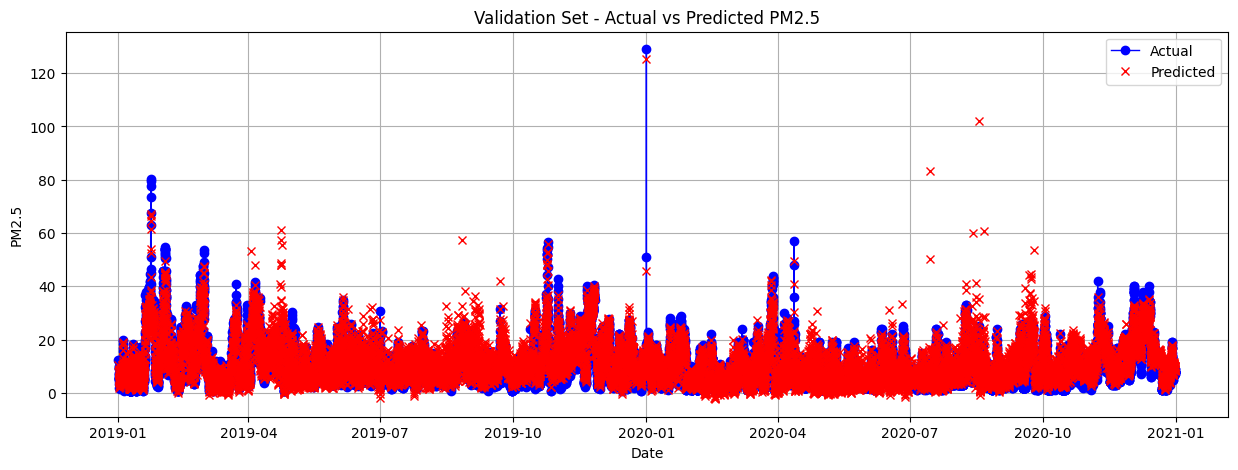

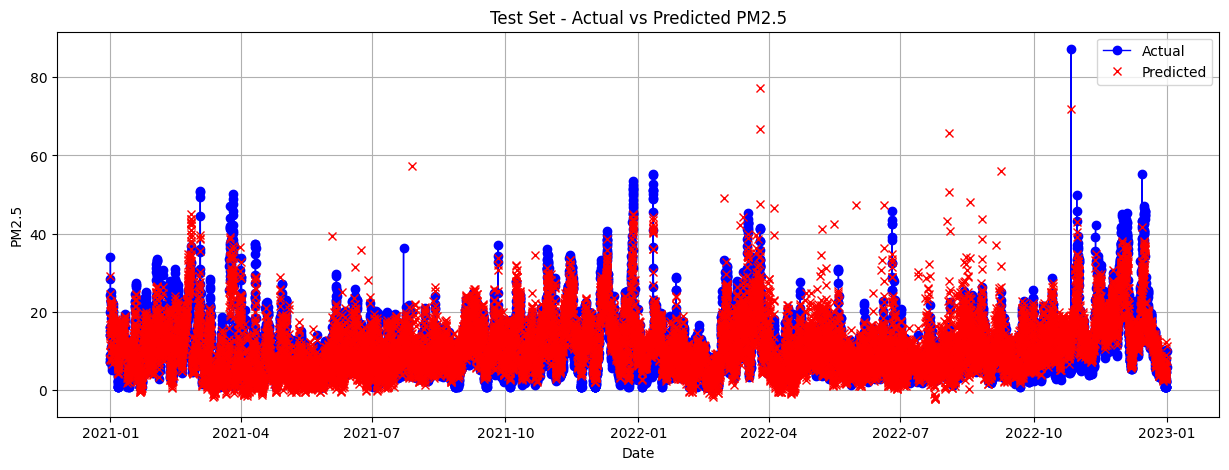

In [4]:
# HOURLY
td.arimax_train_and_evolve(df_hourly)

Training set size: 2191
Validation set size: 730
Test set size: 731
RUNNING THE L-BFGS-B CODE


/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21067D+00    |proj g|=  7.11271D-01

At iterate    5    f=  2.19768D+00    |proj g|=  6.43200D-02

At iterate   10    f=  2.18722D+00    |proj g|=  7.42334D-03

At iterate   15    f=  2.18707D+00    |proj g|=  1.22610D-02

At iterate   20    f=  2.18651D+00    |proj g|=  2.27992D-02

At iterate   25    f=  2.18328D+00    |proj g|=  3.57292D-02

At iterate   30    f=  2.18078D+00    |proj g|=  2.31954D-02

At iterate   35    f=  2.18023D+00    |proj g|=  3.09496D-02

At iterate   40    f=  2.17924D+00    |proj g|=  3.20988D-02

At iterate   45    f=  2.17759D+00    |proj g|=  3.16465D-02

At iterate   50    f=  2.17582D+00    |proj g|=  1.37077D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = numbe

/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 1.8165
MSE: 7.0197
RMSE: 2.6495
MAPE: 0.2497
MASE: 0.5044060469446275
MAE: 1.8085
MSE: 5.7967
RMSE: 2.4076
MAPE: 0.2294
MASE: 0.5157532065610975


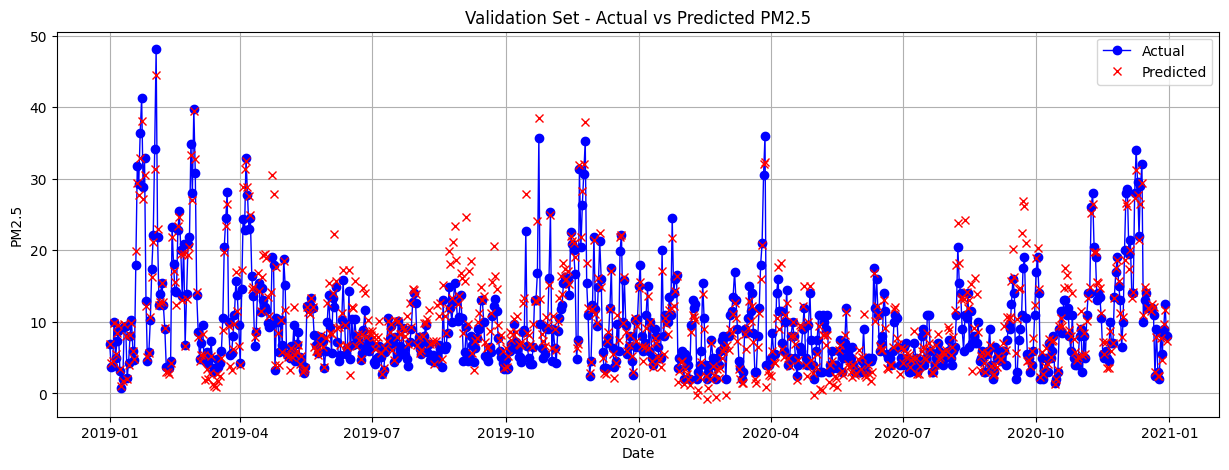

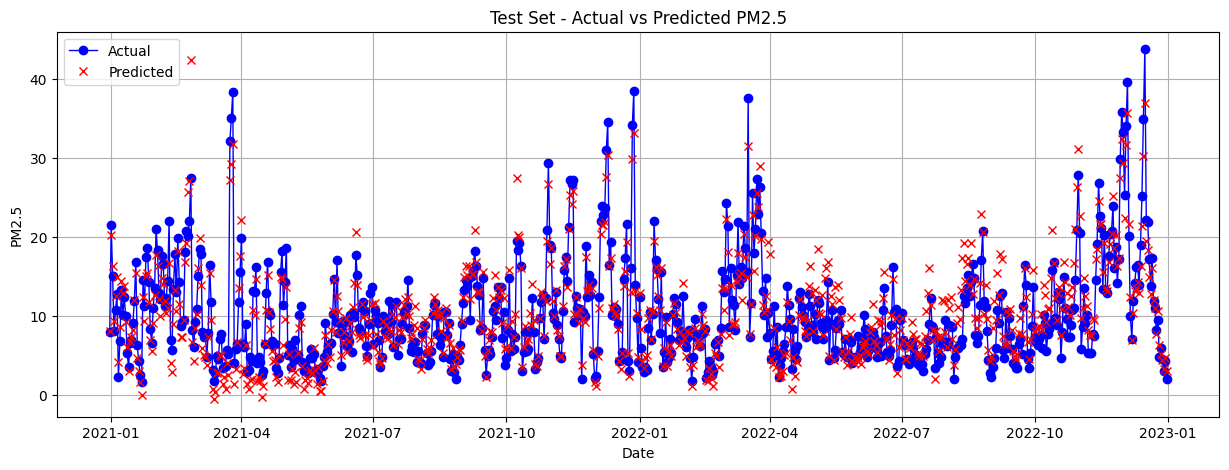

In [5]:
# # DAILY
td.arimax_train_and_evolve(df_daily, 'D')

Training set size: 313
Validation set size: 104
Test set size: 105
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00244D+00    |proj g|=  4.75192D-01

At iterate    5    f=  1.98194D+00    |proj g|=  1.25313D-01

At iterate   10    f=  1.97288D+00    |proj g|=  5.53947D-02


/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  1.96336D+00    |proj g|=  8.83847D-02

At iterate   20    f=  1.95659D+00    |proj g|=  2.54115D-02

At iterate   25    f=  1.95309D+00    |proj g|=  2.27469D-02

At iterate   30    f=  1.95034D+00    |proj g|=  7.00208D-02

At iterate   35    f=  1.94502D+00    |proj g|=  8.50095D-02

At iterate   40    f=  1.94151D+00    |proj g|=  2.88821D-02

At iterate   45    f=  1.93869D+00    |proj g|=  2.19099D-02

At iterate   50    f=  1.93772D+00    |proj g|=  4.16363D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     50     59      1     0     0   4.164D-02   1.938D+00
  F =   1.93772080564

/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


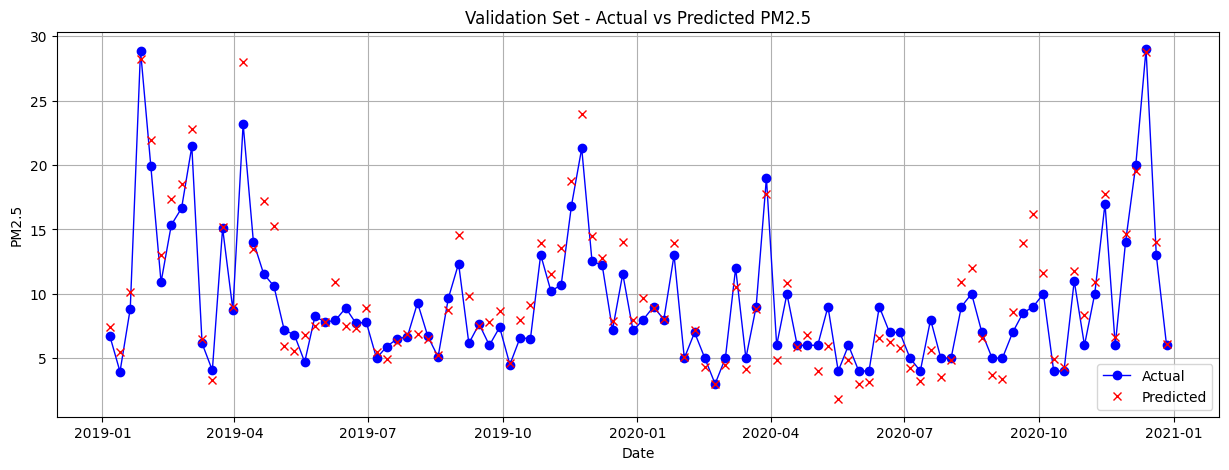

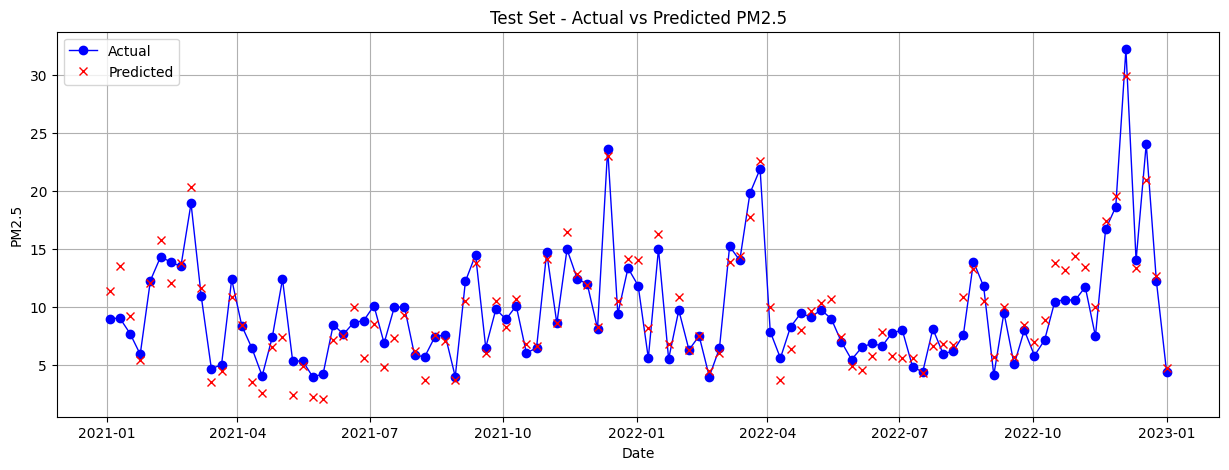

In [6]:
# # WEEKLY
td.arimax_train_and_evolve(df_weekly, 'W')

Training set size: 72
Validation set size: 24
Test set size: 24
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76173D+00    |proj g|=  4.51347D-01

At iterate    5    f=  1.75410D+00    |proj g|=  2.73285D-01

At iterate   10    f=  1.73662D+00    |proj g|=  9.42737D-02

At iterate   15    f=  1.72006D+00    |proj g|=  1.02181D-01

At iterate   20    f=  1.70174D+00    |proj g|=  3.34803D-01

At iterate   25    f=  1.69484D+00    |proj g|=  4.34359D-02


/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   30    f=  1.69323D+00    |proj g|=  3.04249D-02

At iterate   35    f=  1.69174D+00    |proj g|=  5.71141D-02

At iterate   40    f=  1.69100D+00    |proj g|=  2.81468D-02

At iterate   45    f=  1.68094D+00    |proj g|=  2.49983D-01

At iterate   50    f=  1.65755D+00    |proj g|=  5.12515D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     63      1     0     0   5.125D-01   1.658D+00
  F =   1.6575514768299984     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
===== Summary ======
                               SARIMAX Results                                
Dep. Variable

/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


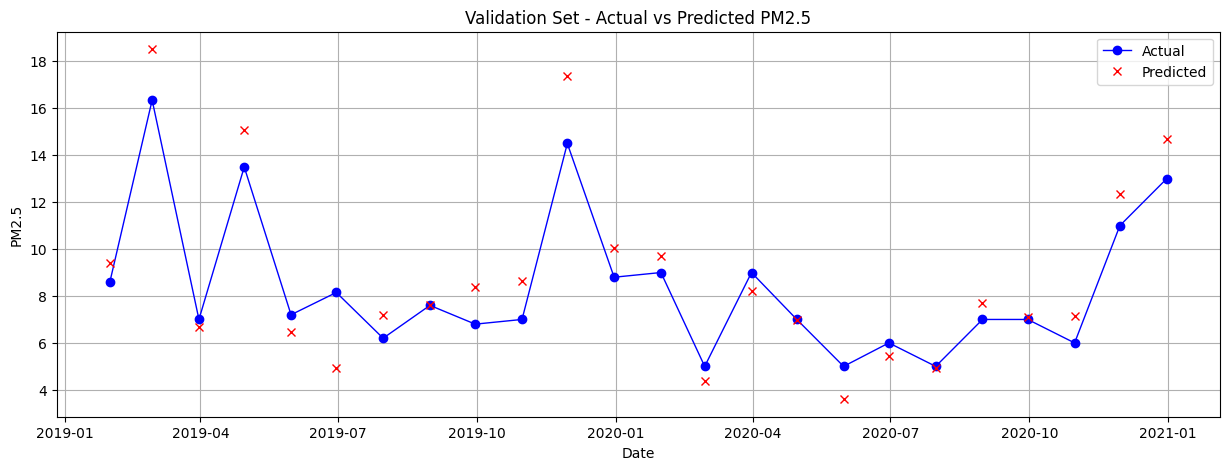

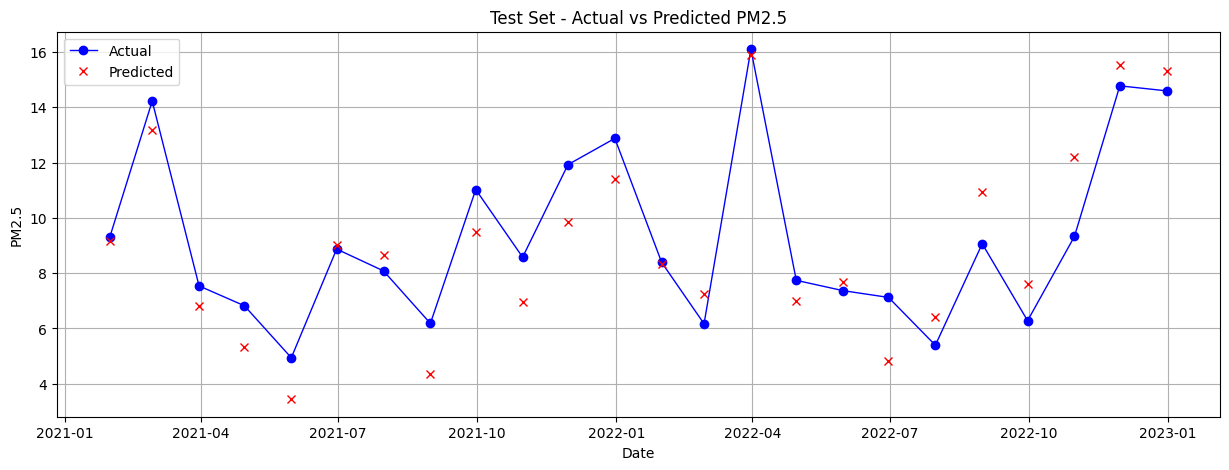

In [7]:
# # MONTLY
td.arimax_train_and_evolve(df_monthly, 'M')

# Hyperparamater tuning for Arimax

In [8]:
# hyperparamater tuning for Arimax

# # HOURLY
# hourly_best_params = td.tune_arimax(df_hourly)

# # DAILY
# daily_best_params = td.tune_arimax(df_daily)

# # WEEKLY
# weekly_best_params = td.tune_arimax(df_weekly)

# # MONTHLY
# monthly_best_params = td.tune_arimax(df_monthly)